In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from data_analysis_utils import summarise_datasets, do_ttest, collate_results

figsize = (12, 6)

# Load in calibration results from .csv files

In [18]:
calib_data = {}

path = './results'
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

for csv in csv_files:
    file = os.path.join(path, csv)
    data_name = csv.split('.')[0]
    calib_data[data_name] = pd.read_csv(file, index_col = 0)

# Calibration and evaluation on same datasets

## Summary statistics

,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,0.944777,1.363656,1.073905,1.365135,1.319827,14.926883
dots_rig,1.199550,0.925462,1.349359,0.933968,0.912419,10.119291
charuco_freehand,1.343829,2.232005,4.242161,3.367961,1.735755,22.619610


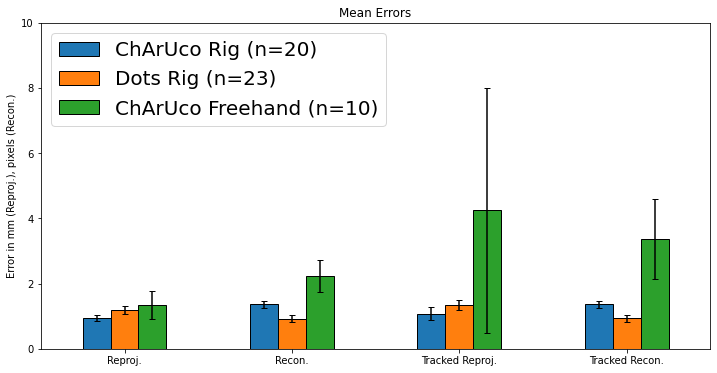

In [24]:
means, stds = summarise_datasets(calib_data, ["charuco_rig", "dots_rig", "charuco_freehand"])
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

means[columns_to_plot].transpose().plot.bar(title="Mean Errors",
                                            ax=ax1,
                                            yerr=stds.transpose(),
                                            ecolor='black',
                                            capsize=3,
                                            rot=0,
                                            legend=None,
                                            ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                           edgecolor=["black"])
ax1.set_ylim(0, 10)

n_charuco_rig = len(calib_data["charuco_rig"])
n_dots_rig = len(calib_data["dots_rig"])
n_charuco_freehand = len(calib_data["charuco_freehand"])

L = ax1.legend(prop={'size': 20})
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])

plt.savefig('plots/charuco_vs_dots_vs_freehand_mean.png', dpi=600)

means

In [20]:
iterative_vs_non_iterative_mean, iterative_vs_non_iterative_std = summarise_datasets(calib_data, ["charuco_rig", "charuco_rig-iterative"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1, 1, 1)

iterative_vs_non_iterative_mean[columns_to_plot].transpose().plot.bar(ax=ax1, title="Iterative vs  Non Iterative Mean Error", rot=0)
iterative_vs_non_iterative_std[columns_to_plot].transpose().plot.bar(title="Iterative vs  Non Iterative Standard Deviation", rot=0)

n_rig = len(calib_data["charuco_rig"])
n_iterative = len(calib_data["charuco_rig-iterative"])

L = ax1.legend()
legend = [f"Charuco Rig (n={n_rig})", f"Charuco Rig Iterative (n={n_iterative})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

fig1.savefig('plots/charuco_iterative_vs_noniterative_mean.png', dpi=600)

do_ttest(calib_data, "charuco_rig-iterative", "charuco_rig")
iterative_vs_non_iterative_mean

KeyError: 'charuco_rig-iterative'

# Calibrate on one data set, evaluate on the remaining ones
'Standard' approaches to calibration involve calbirating and evaluating on the same datasets, which will return favourable results, when compared to evaluating on a different set of data.

Instead iterate through all datasets and use 1 for calibration, and then evaluate on the rest.

This will results in n sets of results, where n is the total number of calibration data sets collected.

In [21]:
dots_folder = 'results/precalib/dots_rig'
charuco_folder = 'results/precalib/charuco_rig'
charuco_freehand_folder = 'results/precalib/charuco_freehand'

precalib_data = {}
threshold = 1000

precalib_data["dots_rig"] = collate_results(dots_folder, threshold=threshold)
precalib_data["charuco_rig"] = collate_results(charuco_folder, threshold=threshold)
precalib_data["charuco_freehand"] = collate_results(charuco_freehand_folder, threshold=threshold)


Processing results/precalib/dots_rig
Processing results/precalib/charuco_rig
Processing results/precalib/charuco_freehand


## Summary Statistics

Mean Values


,Reproj.,Recon.,Tracked Reproj.,Tracked Recon.,Mean Frame Grab Time,Mean Calibration Time
charuco_rig,1.002428,1.544017,1.138226,1.543607,1.259218,16.263608
dots_rig,1.486000,1.385282,1.643235,1.392382,0.880391,9.331577
charuco_freehand,1.643829,3.345215,4.790706,4.464208,1.570753,23.396600


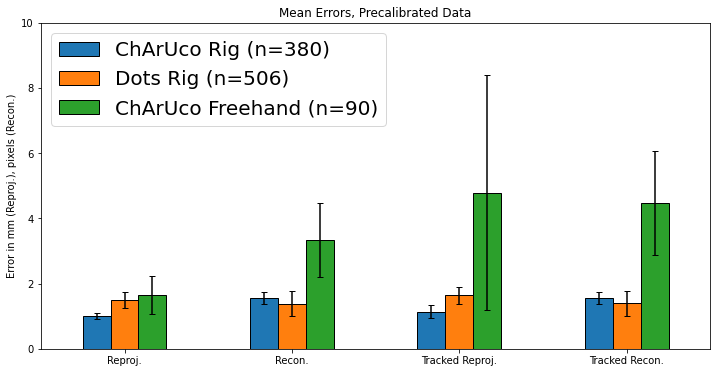

In [26]:
precalib_means, precalib_stds = summarise_datasets(precalib_data, ["charuco_rig", "dots_rig", "charuco_freehand"])

columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

precalib_means[columns_to_plot].transpose().plot.bar(title="Mean Errors, Precalibrated Data",
                                                     ax=ax1,
                                                     yerr=precalib_stds.transpose(),
                                                     ecolor='black',
                                                     capsize=3,
                                                     rot=0,
                                                     legend=None,
                                                     ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                    edgecolor=["black"])
ax1.set_ylim(0, 10)

n_charuco_rig = len(precalib_data["charuco_rig"])
n_dots_rig = len(precalib_data["dots_rig"])
n_charuco_freehand = len(precalib_data["charuco_freehand"])

L = ax1.legend(prop={'size': 20})
legend = [f"ChArUco Rig (n={n_charuco_rig})", f"Dots Rig (n={n_dots_rig})", f"ChArUco Freehand (n={n_charuco_freehand})"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])
L.get_texts()[2].set_text(legend[2])


plt.savefig('plots/_precalib_charuco_vs_dots_vs_freehand_mean.png', dpi=600)

print("Mean Values")
precalib_means

## Compare errors from the two analysis  methods

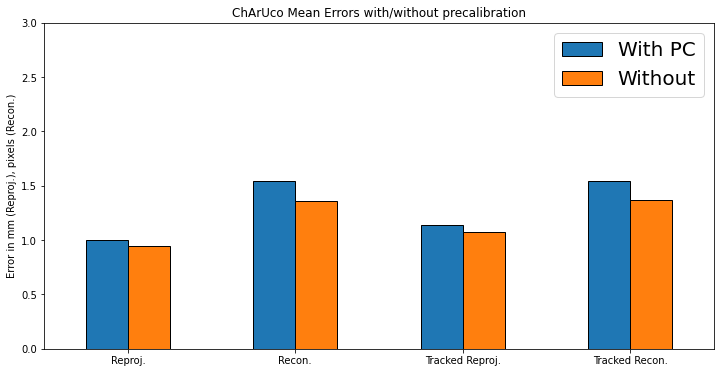

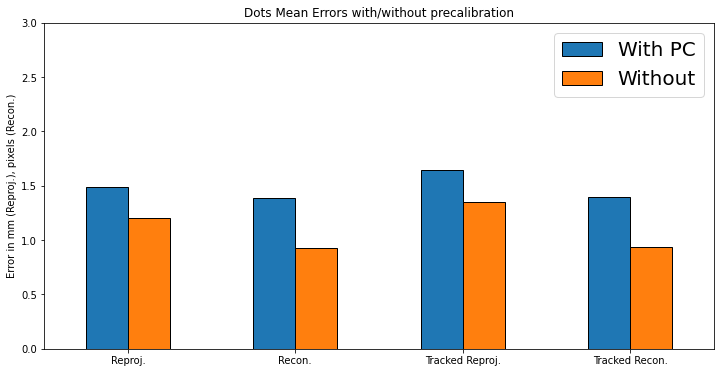

In [23]:
columns_to_plot = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]
labels = ["Reproj.", "Recon.", "Tracked Reproj.", "Tracked Recon."]

charuco = pd.DataFrame()
dots = pd.DataFrame()

# Move the data into a format that can be plotted as desired
charuco["With_precalib"] = precalib_means.transpose()["charuco_rig"]
charuco["Without_precalib"] = means.transpose()["charuco_rig"]
dots["With_precalib"] = precalib_means.transpose()["dots_rig"]
dots["Without_precalib"] = means.transpose()["dots_rig"]

charuco = charuco.transpose()
dots = dots.transpose()

# Plot Charuco
fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

charuco[columns_to_plot].transpose().plot.bar(title="ChArUco Mean Errors with/without precalibration",
                                                        ax=ax1,
                                                        legend=None,
                                                        ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                        rot=0,
                                                         edgecolor=["black"])
ax1.set_ylim(0, 3)

L = ax1.legend(prop={'size': 20})
legend = [f"With PC", f"Without"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

plt.savefig('plots/charuco_precalib_vs_no_precalib.png', dpi=600)

# Plot dots
fig1 = plt.figure(figsize=(figsize))
ax1 = fig1.add_subplot(1, 1, 1)

dots[columns_to_plot].transpose().plot.bar(title="Dots Mean Errors with/without precalibration",
                                                        ax=ax1,
                                                        legend=None,
                                                       rot=0,
                                                        ylabel="Error in mm (Reproj.), pixels (Recon.)",
                                                      edgecolor=["black"])
ax1.set_ylim(0, 3)

L = ax1.legend(prop={'size': 20})
legend = [f"With PC", f"Without"]
L.get_texts()[0].set_text(legend[0])
L.get_texts()[1].set_text(legend[1])

plt.savefig('plots/Dots_precalib_vs_no_precalib.png', dpi=600)